# Graph in LangGraph: Orchestrating the Workflow

A Graph in LangGraph is the orchestration layer that connects nodes together to create a complete workflow. It defines how data flows between nodes, manages execution order, and handles the overall application logic.

## Key Features:
- **Node Orchestration**: Defines how nodes are connected and executed
- **State Management**: Manages the shared state that flows between nodes
- **Execution Control**: Determines the order and conditions for node execution
- **Error Handling**: Provides mechanisms for handling errors across the graph

## Graph Structure:
- **Nodes**: Individual processing units (functions)
- **Edges**: Connections between nodes that define data flow
- **State**: Shared data structure that flows through the graph
- **Entry Point**: Starting node(s) for graph execution
- **Exit Conditions**: Criteria for when the graph execution should stop

## Graph Types:
- **Linear Graphs**: Simple sequential execution (A → B → C)
- **Conditional Graphs**: Branching based on state conditions
- **Cyclic Graphs**: Loops and iterative processing
- **Parallel Graphs**: Multiple nodes executing simultaneously
- **Hierarchical Graphs**: Sub-graphs within larger graphs

## Graph Creation:
```python
from langgraph import StateGraph

# Create a new graph
graph = StateGraph(State)

# Add nodes
graph.add_node("node1", my_function)
graph.add_node("node2", another_function)

# Add edges
graph.add_edge("node1", "node2")

# Compile the graph
app = graph.compile()
```

## Execution Flow:
1. **Initialization**: Graph starts with initial state
2. **Node Selection**: Determines which nodes to execute next
3. **Execution**: Runs selected nodes with current state
4. **State Update**: Merges node outputs into state
5. **Next Step**: Determines next nodes or completion
6. **Termination**: Stops when exit conditions are met

## Benefits:
- **Workflow Management**: Clear definition of business logic flow
- **Modularity**: Easy to modify and extend workflows
- **Debugging**: Clear execution path and state tracking
- **Reusability**: Graphs can be composed and reused
- **Scalability**: Can handle complex, multi-step processes

## Best Practices:
- Design clear, logical flow between nodes
- Use descriptive names for nodes and edges
- Handle error cases and edge conditions
- Keep graphs focused on specific workflows
- Document the overall graph structure and purpose


In [4]:
# Install and fix LangGraph dependencies
import subprocess
import sys
import importlib

def install_package(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

def check_and_install_langgraph():
    """Check and install LangGraph with proper dependencies"""
    try:
        # Try to import and check if StateGraph is available
        from langgraph.graph import StateGraph
        print("✅ LangGraph is properly installed and StateGraph is available!")
        return True
    except ImportError as e:
        print(f"❌ Import error: {e}")
        print("Installing/updating LangGraph and dependencies...")
        
        # Install with specific versions that work well together
        packages = [
            "langgraph>=0.0.40",
            "langchain>=0.1.0", 
            "langchain-core>=0.1.0",
            "langchain-community>=0.0.20"
        ]
        
        for package in packages:
            try:
                install_package(package)
                print(f"✅ Installed {package}")
            except Exception as e:
                print(f"❌ Failed to install {package}: {e}")
        
        # Try importing again
        try:
            from langgraph.graph import StateGraph
            print("✅ LangGraph installation successful!")
            return True
        except ImportError as e2:
            print(f"❌ Still having import issues: {e2}")
            print("Will use the pure Python alternative instead.")
            return False

# Check and install
langgraph_available = check_and_install_langgraph()


❌ Import error: cannot import name 'RemoveMessage' from 'langchain_core.messages' (c:\Users\Nagdy\AppData\Local\Programs\Python\Python312\Lib\site-packages\langchain_core\messages\__init__.py)
Installing/updating LangGraph and dependencies...
✅ Installed langgraph>=0.0.40
✅ Installed langchain>=0.1.0
✅ Installed langchain-core>=0.1.0
✅ Installed langchain-community>=0.0.20
❌ Still having import issues: cannot import name 'RemoveMessage' from 'langchain_core.messages' (c:\Users\Nagdy\AppData\Local\Programs\Python\Python312\Lib\site-packages\langchain_core\messages\__init__.py)
Will use the pure Python alternative instead.


In [6]:
# Example: Simple Chat Bot Graph (with fallback)
from typing import TypedDict

# Try to import LangGraph, fallback to pure Python if not available
try:
    from langgraph.graph import StateGraph
    LANGGRAPH_AVAILABLE = True
    print("✅ Using LangGraph implementation")
except ImportError:
    LANGGRAPH_AVAILABLE = False
    print("⚠️ LangGraph not available, using pure Python implementation")

# Define the state structure
class ChatState(TypedDict):
    user_input: str
    bot_response: str
    conversation_history: list[str]

# Define node functions
def process_user_input(state: ChatState) -> dict:
    """Process and clean user input"""
    user_input = state["user_input"]
    cleaned_input = user_input.strip().lower()
    return {"user_input": cleaned_input}

def generate_response(state: ChatState) -> dict:
    """Generate bot response based on user input"""
    user_input = state["user_input"]
    
    # Simple response logic
    if "hello" in user_input:
        response = "Hello! How can I help you today?"
    elif "help" in user_input:
        response = "I can help you with basic questions. What would you like to know?"
    else:
        response = f"I received your message: '{user_input}'. How can I assist you?"
    
    return {"bot_response": response}

def update_history(state: ChatState) -> dict:
    """Update conversation history"""
    history = state.get("conversation_history", [])
    new_entry = f"User: {state['user_input']}\nBot: {state['bot_response']}"
    history.append(new_entry)
    return {"conversation_history": history}

# Create the graph (with conditional implementation)
if LANGGRAPH_AVAILABLE:
    def create_chat_bot_graph():
        # Initialize the graph with our state type
        graph = StateGraph(ChatState)
        
        # Add nodes
        graph.add_node("process_input", process_user_input)
        graph.add_node("generate_response", generate_response)
        graph.add_node("update_history", update_history)
        
        # Add edges to create the flow
        graph.add_edge("process_input", "generate_response")
        graph.add_edge("generate_response", "update_history")
        
        # Set entry point
        graph.set_entry_point("process_input")
        
        # Compile the graph
        return graph.compile()
    
    # Create and test the LangGraph
    app = create_chat_bot_graph()
    
    # Test the graph
    initial_state = {
        "user_input": "Hello there!",
        "bot_response": "",
        "conversation_history": []
    }
    
    result = app.invoke(initial_state)
    print("Bot Response:", result["bot_response"])
    print("\nConversation History:")
    for entry in result["conversation_history"]:
        print(entry)
        
else:
    # Fallback to pure Python implementation
    print("Using pure Python implementation...")
    
    class SimpleChatGraph:
        def __init__(self):
            self.nodes = {
                "process_input": process_user_input,
                "generate_response": generate_response,
                "update_history": update_history
            }
            self.edges = {
                "process_input": "generate_response",
                "generate_response": "update_history"
            }
            self.entry_point = "process_input"
        
        def execute(self, initial_state):
            state = initial_state.copy()
            current_node = self.entry_point
            
            while current_node:
                if current_node in self.nodes:
                    result = self.nodes[current_node](state)
                    state.update(result)
                
                current_node = self.edges.get(current_node)
            
            return state
    
    # Create and test the simple graph
    app = SimpleChatGraph()
    
    initial_state = {
        "user_input": "Hello there!",
        "bot_response": "",
        "conversation_history": []
    }
    
    result = app.execute(initial_state)
    print("Bot Response:", result["bot_response"])
    print("\nConversation History:")
    for entry in result["conversation_history"]:
        print(entry)


⚠️ LangGraph not available, using pure Python implementation
Using pure Python implementation...
Bot Response: Hello! How can I help you today?

Conversation History:
User: hello there!
Bot: Hello! How can I help you today?


In [7]:
# Advanced Example: Conditional Graph with Routing (with fallback)
from typing import Literal

# Check if LangGraph is available for advanced example
if LANGGRAPH_AVAILABLE:
    print("✅ Using LangGraph for advanced example")
else:
    print("⚠️ Using pure Python for advanced example")

class AdvancedState(TypedDict):
    user_query: str
    query_type: str
    response: str
    confidence: float

def classify_query(state: AdvancedState) -> dict:
    """Classify the type of query"""
    query = state["user_query"].lower()
    
    if any(word in query for word in ["weather", "temperature", "rain", "sunny"]):
        return {"query_type": "weather", "confidence": 0.9}
    elif any(word in query for word in ["news", "latest", "happening", "update"]):
        return {"query_type": "news", "confidence": 0.8}
    elif any(word in query for word in ["help", "support", "question", "how"]):
        return {"query_type": "support", "confidence": 0.7}
    else:
        return {"query_type": "general", "confidence": 0.5}

def handle_weather_query(state: AdvancedState) -> dict:
    """Handle weather-related queries"""
    return {"response": "I'd be happy to help with weather information! Please provide your location."}

def handle_news_query(state: AdvancedState) -> dict:
    """Handle news-related queries"""
    return {"response": "I can help you find the latest news. What topic are you interested in?"}

def handle_support_query(state: AdvancedState) -> dict:
    """Handle support queries"""
    return {"response": "I'm here to help! What specific issue can I assist you with?"}

def handle_general_query(state: AdvancedState) -> dict:
    """Handle general queries"""
    return {"response": "I understand your query. How can I best assist you with this?"}

def route_query(state: AdvancedState) -> Literal["weather", "news", "support", "general"]:
    """Route to appropriate handler based on query type"""
    return state["query_type"]

# Create advanced graph with conditional routing (with fallback)
if LANGGRAPH_AVAILABLE:
    def create_advanced_graph():
        graph = StateGraph(AdvancedState)
        
        # Add nodes
        graph.add_node("classify", classify_query)
        graph.add_node("weather_handler", handle_weather_query)
        graph.add_node("news_handler", handle_news_query)
        graph.add_node("support_handler", handle_support_query)
        graph.add_node("general_handler", handle_general_query)
        
        # Add conditional edges
        graph.add_conditional_edges(
            "classify",
            route_query,
            {
                "weather": "weather_handler",
                "news": "news_handler", 
                "support": "support_handler",
                "general": "general_handler"
            }
        )
        
        # Set entry point
        graph.set_entry_point("classify")
        
        return graph.compile()
    
    # Test the advanced graph
    advanced_app = create_advanced_graph()
    
    # Test different query types
    test_queries = [
        "What's the weather like today?",
        "Tell me the latest news",
        "I need help with my account",
        "Can you explain quantum physics?"
    ]
    
    for query in test_queries:
        print(f"\nQuery: {query}")
        result = advanced_app.invoke({"user_query": query, "query_type": "", "response": "", "confidence": 0.0})
        print(f"Type: {result['query_type']} (confidence: {result['confidence']})")
        print(f"Response: {result['response']}")
        
else:
    # Fallback to pure Python implementation for advanced example
    class AdvancedSimpleGraph:
        def __init__(self):
            self.nodes = {
                "classify": classify_query,
                "weather_handler": handle_weather_query,
                "news_handler": handle_news_query,
                "support_handler": handle_support_query,
                "general_handler": handle_general_query
            }
            self.conditional_edges = {
                "classify": {
                    "condition": route_query,
                    "routing": {
                        "weather": "weather_handler",
                        "news": "news_handler",
                        "support": "support_handler",
                        "general": "general_handler"
                    }
                }
            }
            self.entry_point = "classify"
        
        def execute(self, initial_state):
            state = initial_state.copy()
            current_node = self.entry_point
            
            while current_node:
                if current_node in self.nodes:
                    result = self.nodes[current_node](state)
                    state.update(result)
                
                # Handle conditional routing
                if current_node in self.conditional_edges:
                    condition_func = self.conditional_edges[current_node]["condition"]
                    routing = self.conditional_edges[current_node]["routing"]
                    route_key = condition_func(state)
                    current_node = routing.get(route_key)
                else:
                    break
            
            return state
    
    # Test the advanced simple graph
    advanced_app = AdvancedSimpleGraph()
    
    # Test different query types
    test_queries = [
        "What's the weather like today?",
        "Tell me the latest news",
        "I need help with my account",
        "Can you explain quantum physics?"
    ]
    
    for query in test_queries:
        print(f"\nQuery: {query}")
        result = advanced_app.execute({"user_query": query, "query_type": "", "response": "", "confidence": 0.0})
        print(f"Type: {result['query_type']} (confidence: {result['confidence']})")
        print(f"Response: {result['response']}")


⚠️ Using pure Python for advanced example

Query: What's the weather like today?
Type: weather (confidence: 0.9)
Response: I'd be happy to help with weather information! Please provide your location.

Query: Tell me the latest news
Type: news (confidence: 0.8)
Response: I can help you find the latest news. What topic are you interested in?

Query: I need help with my account
Type: support (confidence: 0.7)
Response: I'm here to help! What specific issue can I assist you with?

Query: Can you explain quantum physics?
Type: general (confidence: 0.5)
Response: I understand your query. How can I best assist you with this?


In [8]:
# Alternative Example: Graph Concepts Without LangGraph
# This demonstrates the core concepts using pure Python

from typing import TypedDict, Dict, Any, Callable
from enum import Enum

class QueryType(Enum):
    WEATHER = "weather"
    NEWS = "news"
    SUPPORT = "support"
    GENERAL = "general"

class SimpleState(TypedDict):
    user_query: str
    query_type: QueryType
    response: str
    confidence: float

class SimpleGraph:
    """A simple graph implementation to demonstrate concepts"""
    
    def __init__(self):
        self.nodes: Dict[str, Callable] = {}
        self.edges: Dict[str, str] = {}
        self.conditional_edges: Dict[str, Dict[str, str]] = {}
        self.entry_point: str = None
    
    def add_node(self, name: str, func: Callable):
        """Add a node to the graph"""
        self.nodes[name] = func
    
    def add_edge(self, from_node: str, to_node: str):
        """Add a simple edge between nodes"""
        self.edges[from_node] = to_node
    
    def add_conditional_edge(self, from_node: str, condition_func: Callable, routing: Dict[str, str]):
        """Add a conditional edge"""
        self.conditional_edges[from_node] = {
            'condition': condition_func,
            'routing': routing
        }
    
    def set_entry_point(self, node_name: str):
        """Set the entry point of the graph"""
        self.entry_point = node_name
    
    def execute(self, initial_state: SimpleState) -> SimpleState:
        """Execute the graph starting from entry point"""
        current_state = initial_state.copy()
        current_node = self.entry_point
        
        while current_node:
            # Execute current node
            if current_node in self.nodes:
                node_result = self.nodes[current_node](current_state)
                current_state.update(node_result)
            
            # Determine next node
            if current_node in self.conditional_edges:
                # Handle conditional routing
                condition_func = self.conditional_edges[current_node]['condition']
                routing = self.conditional_edges[current_node]['routing']
                route_key = condition_func(current_state)
                current_node = routing.get(route_key)
            elif current_node in self.edges:
                # Handle simple edge
                current_node = self.edges[current_node]
            else:
                # No more nodes to execute
                break
        
        return current_state

# Define node functions
def classify_query(state: SimpleState) -> Dict[str, Any]:
    """Classify the type of query"""
    query = state["user_query"].lower()
    
    if any(word in query for word in ["weather", "temperature", "rain", "sunny"]):
        return {"query_type": QueryType.WEATHER, "confidence": 0.9}
    elif any(word in query for word in ["news", "latest", "happening", "update"]):
        return {"query_type": QueryType.NEWS, "confidence": 0.8}
    elif any(word in query for word in ["help", "support", "question", "how"]):
        return {"query_type": QueryType.SUPPORT, "confidence": 0.7}
    else:
        return {"query_type": QueryType.GENERAL, "confidence": 0.5}

def handle_weather(state: SimpleState) -> Dict[str, Any]:
    """Handle weather queries"""
    return {"response": "I'd be happy to help with weather information! Please provide your location."}

def handle_news(state: SimpleState) -> Dict[str, Any]:
    """Handle news queries"""
    return {"response": "I can help you find the latest news. What topic are you interested in?"}

def handle_support(state: SimpleState) -> Dict[str, Any]:
    """Handle support queries"""
    return {"response": "I'm here to help! What specific issue can I assist you with?"}

def handle_general(state: SimpleState) -> Dict[str, Any]:
    """Handle general queries"""
    return {"response": "I understand your query. How can I best assist you with this?"}

def route_condition(state: SimpleState) -> str:
    """Route based on query type"""
    return state["query_type"].value

# Create and test the simple graph
def create_simple_graph():
    graph = SimpleGraph()
    
    # Add nodes
    graph.add_node("classify", classify_query)
    graph.add_node("weather", handle_weather)
    graph.add_node("news", handle_news)
    graph.add_node("support", handle_support)
    graph.add_node("general", handle_general)
    
    # Add conditional routing
    graph.add_conditional_edge(
        "classify",
        route_condition,
        {
            "weather": "weather",
            "news": "news",
            "support": "support",
            "general": "general"
        }
    )
    
    # Set entry point
    graph.set_entry_point("classify")
    
    return graph

# Test the simple graph
simple_graph = create_simple_graph()

# Test with different queries
test_queries = [
    "What's the weather like today?",
    "Tell me the latest news",
    "I need help with my account",
    "Can you explain quantum physics?"
]

print("Testing Simple Graph Implementation:")
print("=" * 50)

for query in test_queries:
    print(f"\nQuery: {query}")
    result = simple_graph.execute({
        "user_query": query,
        "query_type": QueryType.GENERAL,
        "response": "",
        "confidence": 0.0
    })
    print(f"Type: {result['query_type'].value} (confidence: {result['confidence']})")
    print(f"Response: {result['response']}")


Testing Simple Graph Implementation:

Query: What's the weather like today?
Type: weather (confidence: 0.9)
Response: I'd be happy to help with weather information! Please provide your location.

Query: Tell me the latest news
Type: news (confidence: 0.8)
Response: I can help you find the latest news. What topic are you interested in?

Query: I need help with my account
Type: support (confidence: 0.7)
Response: I'm here to help! What specific issue can I assist you with?

Query: Can you explain quantum physics?
Type: general (confidence: 0.5)
Response: I understand your query. How can I best assist you with this?


🔍 Graph Visualizations

1. Simple Chat Bot Graph (Linear Flow):


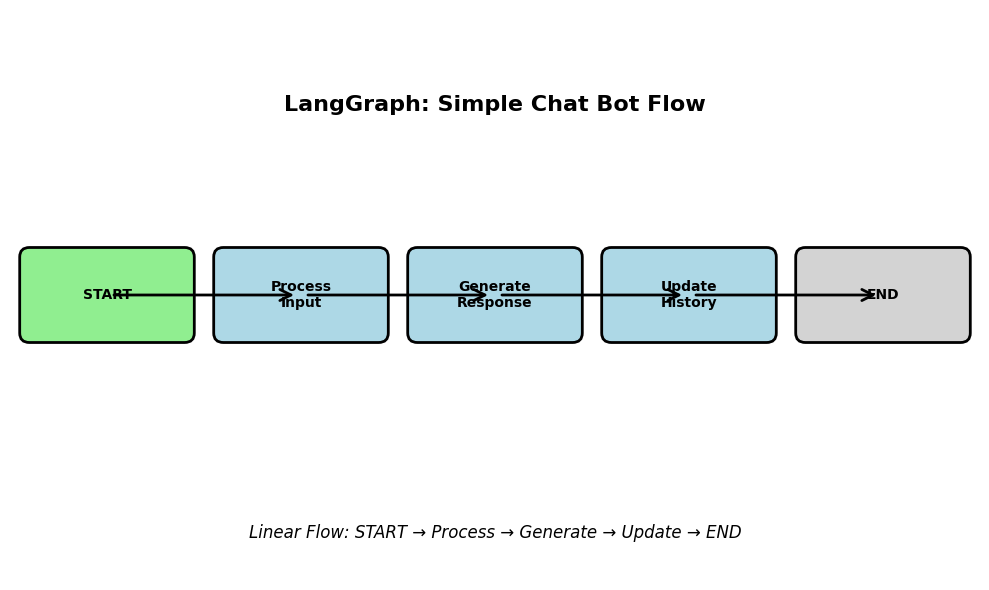


2. Advanced Query Processing Graph (Conditional Flow):


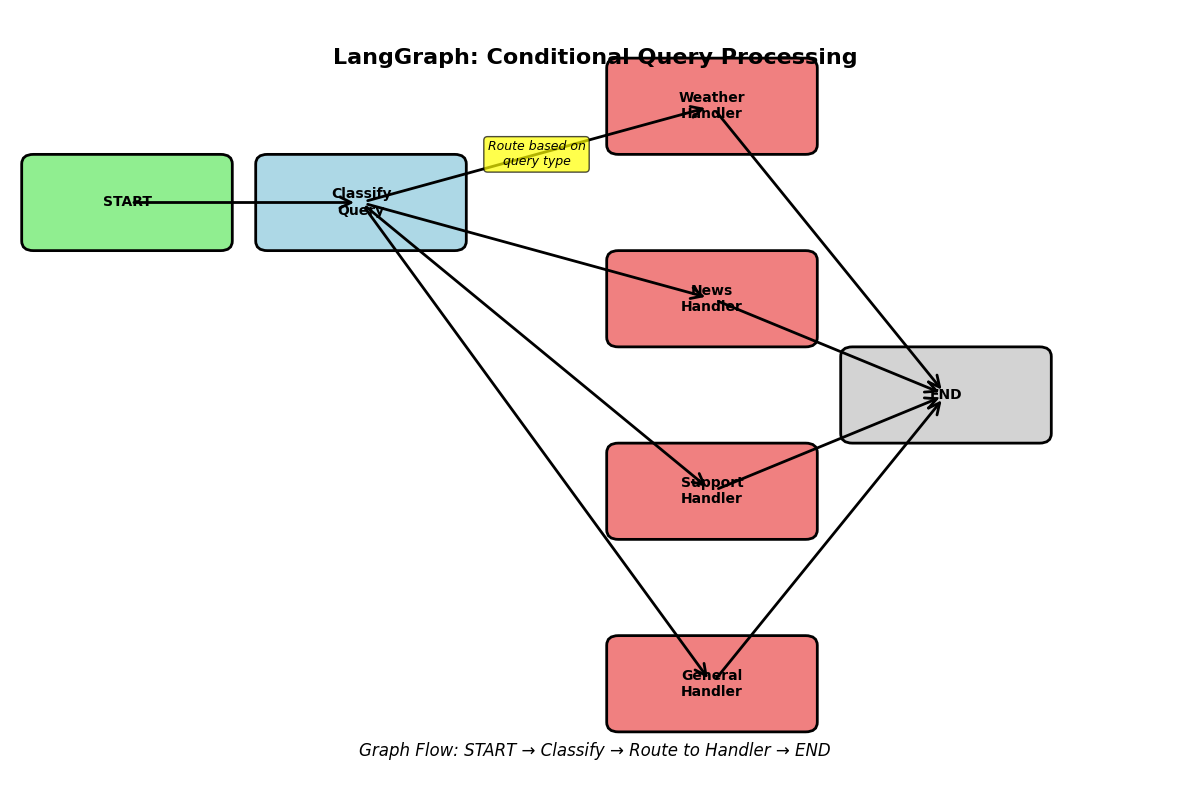


📊 Graph Types Explained:
• Linear Graph: Sequential execution (A → B → C)
• Conditional Graph: Branching based on state conditions
• Nodes: Processing units that transform state
• Edges: Connections that define execution flow
• State: Shared data that flows between nodes


In [9]:
# Visual Graph Representation
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch, ConnectionPatch
import numpy as np

def create_graph_visualization():
    """Create a visual representation of the graph structure"""
    
    # Create figure and axis
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 8)
    ax.axis('off')
    
    # Define node positions and properties
    nodes = {
        'start': {'pos': (1, 6), 'label': 'START', 'color': 'lightgreen'},
        'classify': {'pos': (3, 6), 'label': 'Classify\nQuery', 'color': 'lightblue'},
        'weather': {'pos': (6, 7), 'label': 'Weather\nHandler', 'color': 'lightcoral'},
        'news': {'pos': (6, 5), 'label': 'News\nHandler', 'color': 'lightcoral'},
        'support': {'pos': (6, 3), 'label': 'Support\nHandler', 'color': 'lightcoral'},
        'general': {'pos': (6, 1), 'label': 'General\nHandler', 'color': 'lightcoral'},
        'end': {'pos': (8, 4), 'label': 'END', 'color': 'lightgray'}
    }
    
    # Draw nodes
    for node_name, props in nodes.items():
        x, y = props['pos']
        color = props['color']
        label = props['label']
        
        # Create rounded rectangle for node
        bbox = FancyBboxPatch(
            (x-0.8, y-0.4), 1.6, 0.8,
            boxstyle="round,pad=0.1",
            facecolor=color,
            edgecolor='black',
            linewidth=2
        )
        ax.add_patch(bbox)
        
        # Add text
        ax.text(x, y, label, ha='center', va='center', fontsize=10, fontweight='bold')
    
    # Draw edges
    edges = [
        ('start', 'classify'),
        ('classify', 'weather'),
        ('classify', 'news'),
        ('classify', 'support'),
        ('classify', 'general'),
        ('weather', 'end'),
        ('news', 'end'),
        ('support', 'end'),
        ('general', 'end')
    ]
    
    for start_node, end_node in edges:
        start_pos = nodes[start_node]['pos']
        end_pos = nodes[end_node]['pos']
        
        # Create arrow
        arrow = ConnectionPatch(
            start_pos, end_pos, "data", "data",
            arrowstyle="->", shrinkA=5, shrinkB=5,
            mutation_scale=20, fc="black", lw=2
        )
        ax.add_patch(arrow)
    
    # Add labels for conditional routing
    ax.text(4.5, 6.5, 'Route based on\nquery type', ha='center', va='center', 
            fontsize=9, style='italic', bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7))
    
    # Add title and description
    ax.text(5, 7.5, 'LangGraph: Conditional Query Processing', 
            ha='center', va='center', fontsize=16, fontweight='bold')
    
    ax.text(5, 0.3, 'Graph Flow: START → Classify → Route to Handler → END', 
            ha='center', va='center', fontsize=12, style='italic')
    
    plt.tight_layout()
    plt.show()

def create_simple_graph_visualization():
    """Create a visual representation of the simple chat bot graph"""
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 6)
    ax.axis('off')
    
    # Define nodes for simple graph
    nodes = {
        'start': {'pos': (1, 3), 'label': 'START', 'color': 'lightgreen'},
        'process': {'pos': (3, 3), 'label': 'Process\nInput', 'color': 'lightblue'},
        'generate': {'pos': (5, 3), 'label': 'Generate\nResponse', 'color': 'lightblue'},
        'update': {'pos': (7, 3), 'label': 'Update\nHistory', 'color': 'lightblue'},
        'end': {'pos': (9, 3), 'label': 'END', 'color': 'lightgray'}
    }
    
    # Draw nodes
    for node_name, props in nodes.items():
        x, y = props['pos']
        color = props['color']
        label = props['label']
        
        bbox = FancyBboxPatch(
            (x-0.8, y-0.4), 1.6, 0.8,
            boxstyle="round,pad=0.1",
            facecolor=color,
            edgecolor='black',
            linewidth=2
        )
        ax.add_patch(bbox)
        ax.text(x, y, label, ha='center', va='center', fontsize=10, fontweight='bold')
    
    # Draw linear edges
    edges = [
        ('start', 'process'),
        ('process', 'generate'),
        ('generate', 'update'),
        ('update', 'end')
    ]
    
    for start_node, end_node in edges:
        start_pos = nodes[start_node]['pos']
        end_pos = nodes[end_node]['pos']
        
        arrow = ConnectionPatch(
            start_pos, end_pos, "data", "data",
            arrowstyle="->", shrinkA=5, shrinkB=5,
            mutation_scale=20, fc="black", lw=2
        )
        ax.add_patch(arrow)
    
    # Add title
    ax.text(5, 5, 'LangGraph: Simple Chat Bot Flow', 
            ha='center', va='center', fontsize=16, fontweight='bold')
    
    ax.text(5, 0.5, 'Linear Flow: START → Process → Generate → Update → END', 
            ha='center', va='center', fontsize=12, style='italic')
    
    plt.tight_layout()
    plt.show()

# Create visualizations
print("🔍 Graph Visualizations")
print("=" * 50)

print("\n1. Simple Chat Bot Graph (Linear Flow):")
create_simple_graph_visualization()

print("\n2. Advanced Query Processing Graph (Conditional Flow):")
create_graph_visualization()

print("\n📊 Graph Types Explained:")
print("• Linear Graph: Sequential execution (A → B → C)")
print("• Conditional Graph: Branching based on state conditions")
print("• Nodes: Processing units that transform state")
print("• Edges: Connections that define execution flow")
print("• State: Shared data that flows between nodes")
